# NOTE: change to SMTPLIB for emailing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

if os.getcwd()[-7:] == 'AAM_Sim':
    print(os.getcwd())
else:
    path_parent = os.path.dirname(os.getcwd())
    os.chdir(path_parent)
    path_parent = os.path.dirname(os.getcwd())
    os.chdir(path_parent)
    print(os.getcwd())

from CrossPlatformDev import my_print, join_str

import time
import psutil

from MonteCarlo.TwoAircraftEncounter.ScenarioMP_Sensitivity_Analysis import simulate_encounter

C:\Users\quekz\PycharmProjects\AAM_Sim


### Turn off warnings in Linux (AWS)... tqdm seems to have issues displaying correctly if there are many warnings. 

In [2]:
import warnings
import platform
if platform.system() == 'Linux':
    warnings.filterwarnings('ignore') # <---- hides warnings, makes tqdm work better.

In [3]:
# Init_Param_Path = join_str(os.getcwd(), 'MonteCarlo', 'TwoAircraftEncounter', 'Init_Param_Sensitivity_Analysis.csv')
# data = pd.read_csv(Init_Param_Path)

# num_of_runs_to_sim = 6

# data['Combined_Spds'] = data['AC1_Cruise_Speed'] + data['AC2_Cruise_Speed']
# data = data.sort_values('Combined_Spds', ascending=False)
# data[['Run', 'Combined_Spds', 'AC1_Trk_Unit_Clk_Sync_Err']].head(5)

In [4]:
# data = data['Run'].head(num_of_runs_to_sim).unique()  # <--- Returns a list (technically, in this case it's a pd.Series instance)
# data

In [5]:
import multiprocessing as mp
from tqdm.notebook import tqdm
import psutil
from MonteCarlo.TwoAircraftEncounter.ScenarioMP_Sensitivity_Analysis_v2 import simulate_encounter

Init_Param_Path = join_str(os.getcwd(), 'MonteCarlo', 'TwoAircraftEncounter', 'Init_Param_Sensitivity_Analysis.csv')
data = pd.read_csv(Init_Param_Path)

data = data['Run'].unique()[0:10]  # <--- Returns a list (technically, in this case it's a pd.Series instance)
# data = data['Run'].unique()

if __name__ == '__main__':
    start = time.time()
    with mp.Pool(processes = 2) as pool:
    # with mp.Pool(processes = psutil.cpu_count(logical=True)) as pool:
        results = list(tqdm(pool.imap(simulate_encounter, data), total = len(data)))
        pool.close()
        pool.join()
        results = pd.concat(results)
        end = time.time()
        
compute_time = end-start
simulated_flight_time_s = results['Total_Flight_Time'].sum()
speedup = simulated_flight_time_s/compute_time
print('Took %.3f seconds, simulated flight time is %.3f seconds, total speedup is %.3f times'%(end-start, 
                                                                                               simulated_flight_time_s, 
                                                                                               speedup))

results

C:\Users\quekz\PycharmProjects\AAM_Sim


  0%|          | 0/10 [00:00<?, ?it/s]

Took 308.694 seconds, simulated flight time is 1507.342 seconds, total speedup is 4.883 times


,Run,AC1_Dist_to_Last_WPT,AC2_Dist_to_Last_WPT,AC1_EndState_Time,AC2_EndState_Time,Total_Flight_Time,GT_NC2_Start_Time,GT_NC2_End_Time,GT_NC2_Detected,GT_NC2_Rel_Hdg_(Actual_Rad),...,Worst_ExtOff_WC_Dist_30m_Start_Time,Worst_ExtOff_WC_Dist_30m_End_Time,Worst_ExtOff_WC_Dist_30m_Detected,Worst_ExtOff_WC_Dist_30m_Rel_Hdg_(Actual_Rad),Worst_ExtOff_WC_Dist_30m_Rel_Hdg_(Desired_Track_Rad),Worst_ExtOff_WC_Dist_30m_Rel_Vel_Hdg_(Actual_Rad),Worst_ExtOff_WC_Dist_30m_Rel_Hor_Dist,Worst_ExtOff_WC_Dist_30m_Rel_Hor_Dist_Delta,Worst_ExtOff_WC_Dist_30m_Rel_Vert_Dist,Worst_ExtOff_WC_Dist_30m_Rel_Vert_Dist_Delta
0,0,5.903403,2.272749,75.166667,75.225000,150.391667,None,None,0,None,...,47.145833,49.945833,1,3.128686,3.134613,2.986803,52.854586,43.530955,4.362620,2.973733
0,1,7.034130,2.848207,74.033333,76.558333,150.591667,None,None,0,None,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2,4.083389,3.893693,75.208333,75.208333,150.416667,None,None,0,None,...,44.454167,44.654167,1,3.042454,2.916627,2.492345,41.724440,18.486462,0.169185,-0.101609
0,3,3.503327,4.049144,73.633333,75.650000,149.283333,None,None,0,None,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,4,2.814936,5.393010,75.050000,75.066667,150.116667,None,None,0,None,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,5,7.685957,7.466950,74.533333,76.233333,150.766667,None,None,0,None,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,6,3.519073,1.198545,76.308333,75.791667,152.100000,None,None,0,None,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,7,8.185541,17.413652,75.041667,76.925000,151.966667,None,None,0,None,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,8,5.916548,2.801988,74.908333,76.633333,151.541667,None,None,0,None,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,9,5.511750,5.115394,74.733333,75.433333,150.166667,None,None,0,None,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
results.columns

Index(['Run', 'AC1_Dist_to_Last_WPT', 'AC2_Dist_to_Last_WPT',
       'AC1_EndState_Time', 'AC2_EndState_Time', 'Total_Flight_Time',
       'GT_NC2_Start_Time', 'GT_NC2_End_Time', 'GT_NC2_Detected',
       'GT_NC2_Rel_Hdg_(Actual_Rad)',
       ...
       'Worst_ExtOff_WC_Dist_30m_Start_Time',
       'Worst_ExtOff_WC_Dist_30m_End_Time',
       'Worst_ExtOff_WC_Dist_30m_Detected',
       'Worst_ExtOff_WC_Dist_30m_Rel_Hdg_(Actual_Rad)',
       'Worst_ExtOff_WC_Dist_30m_Rel_Hdg_(Desired_Track_Rad)',
       'Worst_ExtOff_WC_Dist_30m_Rel_Vel_Hdg_(Actual_Rad)',
       'Worst_ExtOff_WC_Dist_30m_Rel_Hor_Dist',
       'Worst_ExtOff_WC_Dist_30m_Rel_Hor_Dist_Delta',
       'Worst_ExtOff_WC_Dist_30m_Rel_Vert_Dist',
       'Worst_ExtOff_WC_Dist_30m_Rel_Vert_Dist_Delta'],
      dtype='object', length=1276)

In [7]:
# fig, axs = plt.subplots(ncols=4, figsize=(16,5))

# axs[0].scatter(results['Run'], results['AC1_NSE_Radial_Error_Std'], label='AC1', color='b', alpha=0.5)
# axs[0].scatter(results['Run'], results['AC2_NSE_Radial_Error_Std'], label='AC2', color='orange', alpha=0.5)
# axs[0].set_title('Radial NSE STD')
# axs[0].legend()

# axs[1].scatter(results['Run'], results['AC1_NSE_Std_x'], label='AC1', color='b', alpha=0.5)
# axs[1].scatter(results['Run'], results['AC2_NSE_Std_x'], label='AC2', color='orange', alpha=0.5)
# axs[1].set_title('NSE STD - X')
# axs[1].legend()

# axs[2].scatter(results['Run'], results['AC1_NSE_Std_y'], label='AC1', color='b', alpha=0.5)
# axs[2].scatter(results['Run'], results['AC2_NSE_Std_y'], label='AC2', color='orange', alpha=0.5)
# axs[2].set_title('NSE STD - Y')
# axs[2].legend()

# axs[3].scatter(results['Run'], results['AC1_NSE_Std_z'], label='AC1', color='b', alpha=0.5)
# axs[3].scatter(results['Run'], results['AC2_NSE_Std_z'], label='AC2', color='orange', alpha=0.5)
# axs[3].set_title('NSE STD - Z')
# axs[3].legend()

# plt.show()

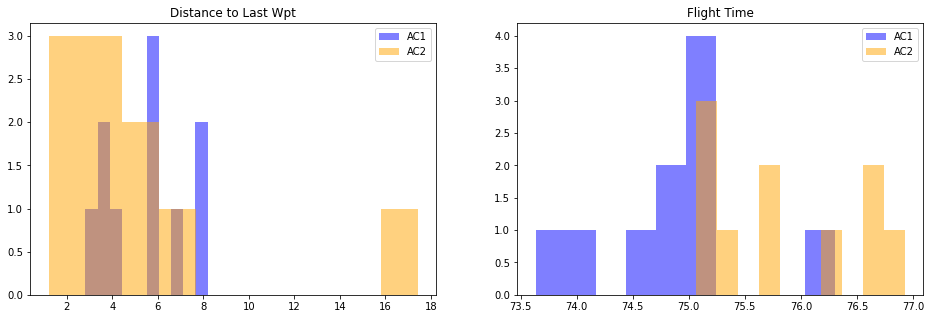

In [8]:
fig, axs = plt.subplots(ncols=2, figsize=(16,5))

axs[0].hist(results['AC1_Dist_to_Last_WPT'], color='b', alpha=0.5, label = 'AC1')
axs[0].hist(results['AC2_Dist_to_Last_WPT'], color='orange', alpha=0.5, label = 'AC2')
axs[0].set_title('Distance to Last Wpt')
axs[0].legend()

axs[1].hist(results['AC1_EndState_Time'], color='b', alpha=0.5, label = 'AC1')
axs[1].hist(results['AC2_EndState_Time'], color='orange', alpha=0.5, label = 'AC2')
axs[1].set_title('Flight Time')
axs[1].legend()

plt.show()

In [9]:
# Results_Path = join_str(os.getcwd(), 'MonteCarlo', 'TwoAircraftEncounter', 'Results_Tracking_Sensitivity_Analysis_v2.csv')

# results.to_csv(Results_Path)

In [10]:
results

,Run,AC1_Dist_to_Last_WPT,AC2_Dist_to_Last_WPT,AC1_EndState_Time,AC2_EndState_Time,Total_Flight_Time,GT_NC2_Start_Time,GT_NC2_End_Time,GT_NC2_Detected,GT_NC2_Rel_Hdg_(Actual_Rad),...,Worst_ExtOff_WC_Dist_30m_Start_Time,Worst_ExtOff_WC_Dist_30m_End_Time,Worst_ExtOff_WC_Dist_30m_Detected,Worst_ExtOff_WC_Dist_30m_Rel_Hdg_(Actual_Rad),Worst_ExtOff_WC_Dist_30m_Rel_Hdg_(Desired_Track_Rad),Worst_ExtOff_WC_Dist_30m_Rel_Vel_Hdg_(Actual_Rad),Worst_ExtOff_WC_Dist_30m_Rel_Hor_Dist,Worst_ExtOff_WC_Dist_30m_Rel_Hor_Dist_Delta,Worst_ExtOff_WC_Dist_30m_Rel_Vert_Dist,Worst_ExtOff_WC_Dist_30m_Rel_Vert_Dist_Delta
0,0,5.903403,2.272749,75.166667,75.225000,150.391667,None,None,0,None,...,47.145833,49.945833,1,3.128686,3.134613,2.986803,52.854586,43.530955,4.362620,2.973733
0,1,7.034130,2.848207,74.033333,76.558333,150.591667,None,None,0,None,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2,4.083389,3.893693,75.208333,75.208333,150.416667,None,None,0,None,...,44.454167,44.654167,1,3.042454,2.916627,2.492345,41.724440,18.486462,0.169185,-0.101609
0,3,3.503327,4.049144,73.633333,75.650000,149.283333,None,None,0,None,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,4,2.814936,5.393010,75.050000,75.066667,150.116667,None,None,0,None,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,5,7.685957,7.466950,74.533333,76.233333,150.766667,None,None,0,None,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,6,3.519073,1.198545,76.308333,75.791667,152.100000,None,None,0,None,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,7,8.185541,17.413652,75.041667,76.925000,151.966667,None,None,0,None,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,8,5.916548,2.801988,74.908333,76.633333,151.541667,None,None,0,None,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,9,5.511750,5.115394,74.733333,75.433333,150.166667,None,None,0,None,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
def keyword_list_filter(l, *keys):
    if len(keys) > 1:
        # print(keys[0])
        l_filtered = list(filter(lambda x: keys[0] in x, l))
        # print('l_filtered', l_filtered, 'keys[1:]', *keys[1:])
        return keyword_list_filter(l_filtered, *keys[1:])
    else:
        # print(keys[0])
        return list(filter(lambda x: keys[0] in x, l))
    
def keyword_list_exclude(l, *keys):
    if len(keys) > 1:
        l_filtered = list(filter(lambda x: keys[0] not in x, l))
        return keyword_list_exclude(l_filtered, *keys[1:])
    else:
        return list(filter(lambda x: keys[0] not in x, l))

def filter_column_names(df, *keys):
    cols = df.columns
    return keyword_list_filter(cols, *keys)

In [12]:
keyword_list_filter(results.columns, 'NC', 'GT', 'Start')

['GT_NC2_Start_Time']

In [13]:
keyword_list_filter(results.columns, 'NC', 'GT')

['GT_NC2_Start_Time',
 'GT_NC2_End_Time',
 'GT_NC2_Detected',
 'GT_NC2_Rel_Hdg_(Actual_Rad)',
 'GT_NC2_Rel_Hdg_(Desired_Track_Rad)',
 'GT_NC2_Rel_Vel_Hdg_(Actual_Rad)',
 'GT_NC2_Rel_Hor_Dist',
 'GT_NC2_Rel_Hor_Dist_Delta',
 'GT_NC2_Rel_Vert_Dist',
 'GT_NC2_Rel_Vert_Dist_Delta']

In [14]:
minidf = results.loc[results['GT_WC_Dist_30m_Detected'] == 1][keyword_list_filter(results.columns, '30', 'Detected')]

# MiniResults_Path = join_str(os.getcwd(), 'MonteCarlo', 'TwoAircraftEncounter', 'minidf.csv')

# results.to_csv(MiniResults_Path)

minidf

,GT_WC_Dist_30m_Detected,A99_Ext3_WC_Dist_30m_Detected,A95_Ext3_WC_Dist_30m_Detected,A90_Ext3_WC_Dist_30m_Detected,A85_Ext3_WC_Dist_30m_Detected,A80_Ext3_WC_Dist_30m_Detected,UR0.2_Ext3_WC_Dist_30m_Detected,UR0.33_Ext3_WC_Dist_30m_Detected,UR1_Ext3_WC_Dist_30m_Detected,UR2_Ext3_WC_Dist_30m_Detected,...,L0.3_ExtOff_WC_Dist_30m_Detected,L0.5_ExtOff_WC_Dist_30m_Detected,L0.7_ExtOff_WC_Dist_30m_Detected,L1_ExtOff_WC_Dist_30m_Detected,EXT_R20_ExtOff_WC_Dist_30m_Detected,EXT_R10_ExtOff_WC_Dist_30m_Detected,EXT_R5_ExtOff_WC_Dist_30m_Detected,Best_ExtOff_WC_Dist_30m_Detected,Realistic_ExtOff_WC_Dist_30m_Detected,Worst_ExtOff_WC_Dist_30m_Detected
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0,1,1,0,1,1,1,0,1,0,1,...,1,1,1,0,1,1,1,1,1,1


In [15]:
# results[['L0.1_WC_Dist_15m_Rel_Hor_Dist_Delta',
#          'L0.2_WC_Dist_15m_Rel_Hor_Dist_Delta',
#          'L0.3_WC_Dist_15m_Rel_Hor_Dist_Delta',
#          'L0.5_WC_Dist_15m_Rel_Hor_Dist_Delta', 
#          'L0.7_WC_Dist_15m_Rel_Hor_Dist_Delta',
#          'L1_WC_Dist_15m_Rel_Hor_Dist_Delta', 
#          'GT_WC_Dist_15m_Rel_Hor_Dist_Delta'
#         ]]

In [16]:
# import smtplib, ssl

# email_address = 'tmuas2022@gmail.com'     # add email address here
# Subject = 'Subject: Monte Carlo Results \n\n'
# content = ' Dear Sith Lord, \n Your simulation results beckon.\n\n ' 
# footer = 'Your Droid Army (AWS)'    # add test footer 
# passcode = 'zupmvqlgtwkjyjxl'        # add passcode here
# conn = smtplib.SMTP_SSL('smtp.gmail.com', 465) 
# conn.ehlo()
# conn.login(email_address, passcode)
# conn.sendmail(email_address,
#               'zhihao.quek16@sps.nus.edu.sg',
#               Subject + content + footer)
# conn.quit()